### Gaussian High-pass and Low-pass filters in frequency domain



In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2

In [7]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height

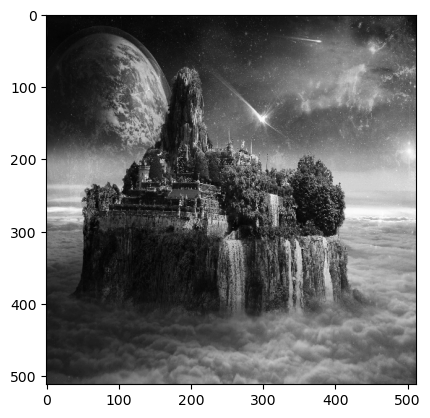

In [8]:
imshow(new_im, cmap='gray')
#new_im


### The Gaussian window is defined by $ w(n)=\exp^{\frac{-1}{2}{\frac{n}{\sigma}}^2}$ where $n$ is the number of pixels in the output window

In [9]:
# create a 2D-gaussian kernel、filter with the same size of the image
kernel = np.outer(signal.gaussian(new_im.shape[0], 5), signal.gaussian(new_im.shape[1], 5))# outer product of two vectors,
#each representing a 1D Gaussian window of size of 5 points

# find Fourier transform of the image f(x,y)
freq = fft2(new_im)
# generate a kernel whose origin is in the top-left corner
kern=ifftshift(kernel) # h(x,y)
# calculate FFT of the kernel
freq_kernel = fft2(kern)
# multiply in the frequency domain
product = freq*freq_kernel
# compute the final result
# take the inverse transform of the product and display the real part
im_out = ifft2(product).real # output blurred image

In [10]:
# scale image to original grey-level intensities in the range from 0 to 255
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out= scaler.transform(im_out)
im_out


array([[23.49416715, 23.40449333, 23.33088683, ..., 24.04015446,
        23.85321087, 23.66723542],
       [18.89824404, 18.90023999, 18.90777139, ..., 19.12692639,
        19.0502281 , 18.97142964],
       [14.64678587, 14.73160744, 14.8129567 , ..., 14.59220979,
        14.61342578, 14.63031089],
       ...,
       [37.41854353, 37.05817292, 36.74932683, ..., 38.93020216,
        38.4036825 , 37.89141104],
       [32.9604177 , 32.68420237, 32.44753696, ..., 34.16565356,
        33.74772989, 33.33903163],
       [28.25039091, 28.06605913, 27.90930864, ..., 29.12827062,
        28.82540556, 28.52731545]])

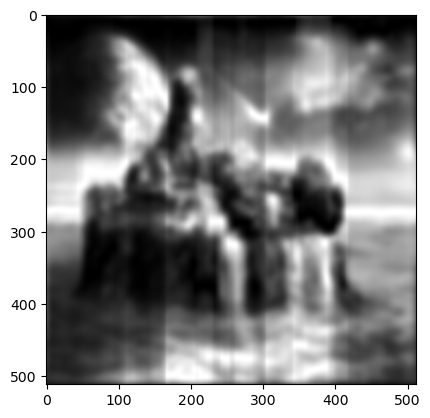

In [11]:
imshow(im_out, cmap='gray')


# Question 1: Is this a high-pass or a low-pass Gaussian filter? By modifying slightly the code above, create a 3-pixel Gaussian kernel and output the resulting image. What do you observe when you narrow the size of the Gaussian wiindow?



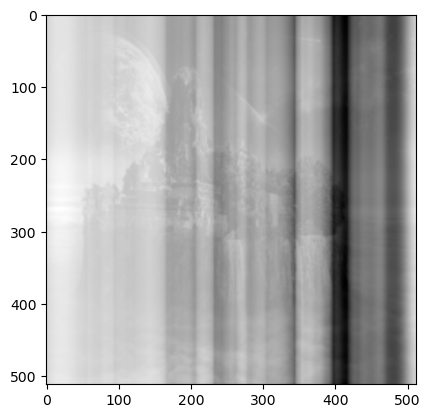

In [13]:
# type your answer here (that includes code)
# Create a 3-pixel Gaussian kernel
kernel_3 = np.outer(signal.gaussian(new_im.shape[0], 1), signal.gaussian(new_im.shape[1], 1)) # 1-pixel standard deviation

# Find Fourier transform of the image f(x,y)
freq = fft2(new_im)

# Generate a kernel whose origin is in the top-left corner
kern_3 = ifftshift(kernel_3) # h(x,y)

# Calculate FFT of the kernel
freq_kernel_3 = fft2(kern_3)

# Multiply in the frequency domain
product_3 = freq * freq_kernel_3

# Compute the final result
# Take the inverse transform of the product and display the real part
im_out_3 = ifft2(product_3).real  # Output blurred image

# Scale image to original gray-level intensities in the range from 0 to 255
im_out_3 = scaler.transform(im_out_3)

# Display the resulting image
imshow(im_out_3, cmap='gray')


high-pass Gaussian filtered image is found by subtracting low-pass filtered image from the original one

Observations: When you narrow the size of the Gaussian window by using a smaller standard deviation (e.g., 1 pixel), the resulting image will be more sharply filtered. This means that it preserves high-frequency details and enhances edges in the image, effectively acting as a high-pass filter.

### Question 2: What would a high-pass Gaussian filter be useful for in the context of image processing?  

1. Edge Detection: It can be used to enhance edges in an image, making them more prominent. This is valuable in applications like object detection and image segmentation.
2. Noise Reduction: By subtracting the high-pass filtered image from the original image, you can obtain a noise-reduced version of the image. High-frequency noise is often suppressed, while the important image structures are preserved.
3. Feature Extraction: High-pass filtering can help in isolating specific image features, such as textures or fine details, for further analysis or feature extraction.
4. Sharpening: When applied in conjunction with the original image, a high-pass filter can sharpen the image by enhancing the high-frequency components. This is commonly used to improve the visual quality of images.

Overall, a high-pass Gaussian filter is a versatile tool in image processing, especially when you need to emphasize fine details and edges while reducing noise.
